![UNIR](https://www.unir.net/wp-content/uploads/2014/10/logo.png)
### Máster en Inteligencia Artificial. 
**Asignatura:** _Sistemas Cognitivos Artificiales_

**Alumno:** _Luisa Sánchez Avivar_

**Fecha:** _5 Mayo 2020_

---

# ACTIVIDAD 1 (II): Redes neuronales con Keras

**Objetivo:** Crear una primera red sencilla con Keras y utilizar otros conceptos avanzados vistos en teoría.
___

# Segunda parte: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [30]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

#### Obtención de los datos y pre-processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [101]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
#     plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
#     plt.show()
    
def plot_compare_losses(history1, history2, history3, name1="Red 1",
                      name2="Red 2", name3="", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    legend = []
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    legend.append('Train ' + name1)
    legend.append('Val ' + name1)
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    legend.append('Train ' + name2)
    legend.append('Val ' + name2)
    if history3 is not None:
        plt.plot(history3.history['loss'], color="red")
        plt.plot(history3.history['val_loss'], 'r--', color="red")
        legend.append('Train ' + name3)
        legend.append('Val ' + name3)
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(legend,
               loc='upper right')
#     plt.show()
    
def plot_compare_accs(history1, history2, history3, name1="Red 1",
                      name2="Red 2", name3="", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    legend = []
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    legend.append('Train ' + name1)
    legend.append('Val ' + name1)
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    legend.append('Train ' + name2)
    legend.append('Val ' + name2)
    if history3 is not None:
        plt.plot(history3.history['accuracy'], color="red")
        plt.plot(history3.history['val_accuracy'], 'r--', color="red")
        legend.append('Train ' + name3)
        legend.append('Val ' + name3)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend, 
               loc='lower right')
#     plt.show()
 
def horizontal_plot_acc_loss(history, w=10, h=5):
    """Ïmprime accuracy y loss horizontalmente de un entrenamiento"""
    plt.figure(figsize=(w,h))
    plt.subplot(1,2,1)
    plot_acc(history)
    plt.subplot(1,2,2)
    plot_loss(history)
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(1.25 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

### 1.1 Modelo con ReLU

In [205]:

## Creamos el modelo
model_1 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilamos
model_1.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_relu = model_1.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)

### 1.2 Modelo con Sigmoid

In [206]:
## Creamos el modelo
model_2 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])

## Compilamos
model_2.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_sigmoid = model_2.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)

### 1.3 Comparativa

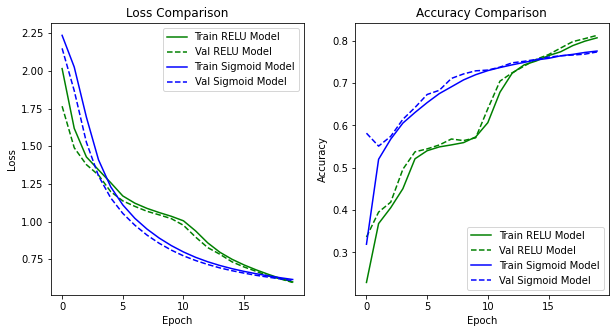

In [207]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_compare_losses(history_relu, history_sigmoid, None, "RELU Model", "Sigmoid Model", "", "Loss Comparison")
plt.subplot(1,2,2)
plot_compare_accs(history_relu, history_sigmoid, None, "RELU Model", "Sigmoid Model", "", "Accuracy Comparison")
plt.show()

Se puede ver que el modelo que usa una función de activación ReLU tiende a un mejor resultado.
Esto puede deberse principalmente a que el uso de sigmoid es apropiado para modelos donde se predice una probabilidad comprendida en [0, 1] ReLu por otro lado está definida entre [0, ∞] lo que la hace más adecuada para este modelo.
En sigmoid, cuanto mayor es el input, más bajo es el gradiente, por lo que esta función de activación tiende a hacer desaparecer dicho gradiente; Esto se traduce como que si tienes muchas capas, esos gradientes se multiplicarán, y debido a que la derviada de la función es < 1, el correspondiente producto de esos gradientes tenderá a 0.
ReLu por el contrario, no hace desaparecer el gradiente al estar definida así:
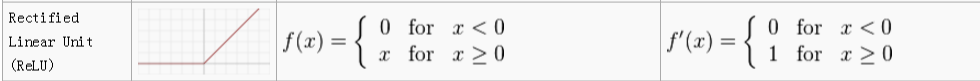


es decir, 0 cuando _x < 0_ y 1 cuando _x >0_, por lo que se podrán a;adir tantas capas como se desee sin ningún efecto secundario negativo.

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

### 2.1 Inicialización con Ceros

In [218]:
## Creamos el modelo
model_1 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu',
         bias_initializer=keras.initializers.Zeros()),
    Dense(64, activation='relu',
         bias_initializer=keras.initializers.Zeros()),
    Dense(2, activation='relu',
         bias_initializer=keras.initializers.Zeros()),
    Dense(10, activation='softmax')
])

## Compilamos
model_1.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_zeros = model_1.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)


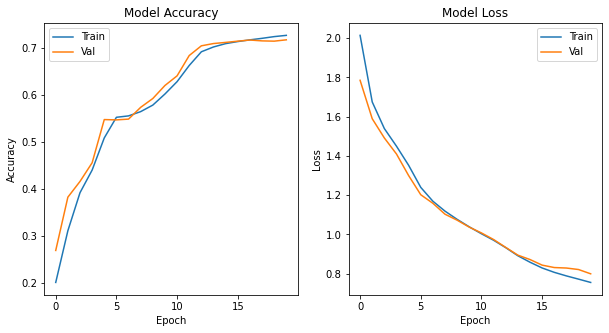

In [117]:
horizontal_plot_acc_loss(history_zeros)

### 2.2 Inicialización Aleatoria Normal

In [216]:
## Creamos el modelo
model_2 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu',
         bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    Dense(64, activation='relu'),
    Dense(2, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilamos
model_2.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_random_normal = model_2.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)

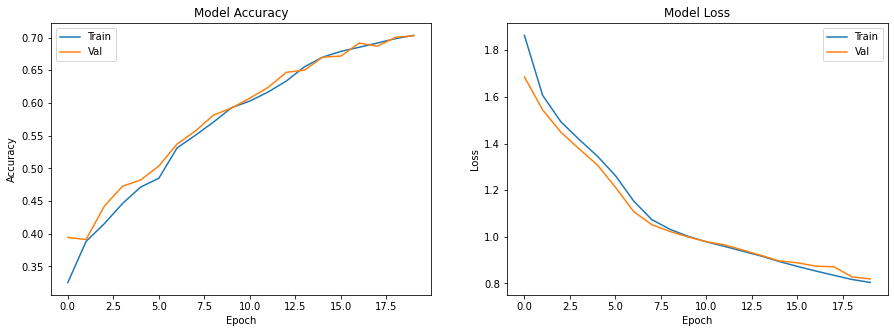

In [217]:
horizontal_plot_acc_loss(history_random_normal, 15)

### 2.3 Incialización con Glorot Uniform

In [219]:
## Creamos el modelo
model_3 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu',
         bias_initializer=keras.initializers.glorot_uniform(seed=None)),
    Dense(64, activation='relu'),
    Dense(2, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilamos
model_3.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_glorot_uniform = model_3.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)

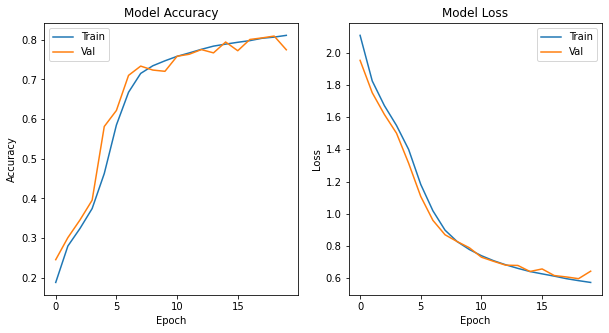

In [106]:
horizontal_plot_acc_loss(history_glorot_uniform)

### 2.4 Comparación de resultados

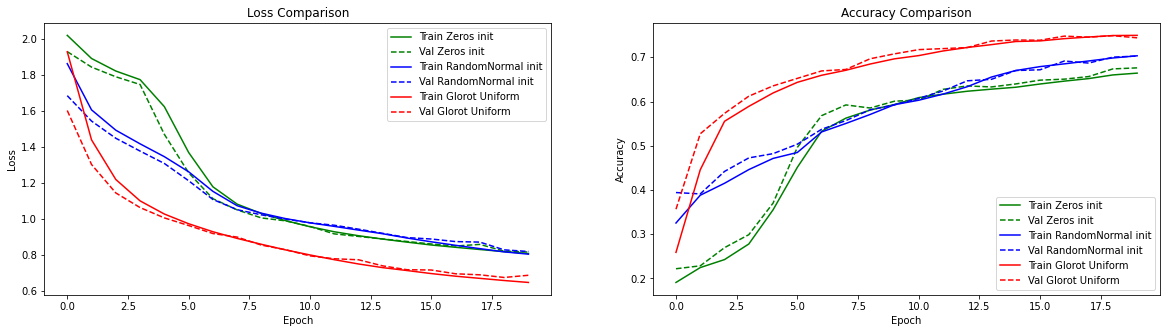

In [220]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_compare_losses(history_zeros, history_random_normal, history_glorot_uniform, "Zeros init", "RandomNormal init", "Glorot Uniform", "Loss Comparison")
plt.subplot(1,2,2)
plot_compare_accs(history_zeros, history_random_normal, history_glorot_uniform, "Zeros init", "RandomNormal init", "Glorot Uniform", "Accuracy Comparison")
plt.show()

En definitiva, se puede apreciar fácilmente que el enfoque Gloriot Uniform, es el que tiene mejores resultados.

- **Zeros**
<br />Provoca una simetría al inicializarlo todo a 0 y hará que todas las neuronas tengan el mismo gradiente en la _backpropagation_ provocando un cambio homogéneo en los parámetros. Esto se traduce como una dificultad para aprender, tal y como muestran los resultados que vemos en la _accuracy_

- **Variable Aleatoria Normal**
<br />Evita el problema anterior haciendo los pesos aleatorios y por lo tanto gradientes distintos.

- **Glorot Uniform**
<br /> Permiten escalar la distribución del peso capa por capa. Básicamente, define una distribución normal o uniforme con una media centrada y una desviación estándar acorde al número de neuronas de entrada y salida de la capa, manteniéndolas en un rango controlado. Esto evita que los pesos y por lo tanto los gradientes, disminuyan o se incrementen demasiado a medida que se propaga a través de la red.

## 3. Optimizadores

**Ejercicio 3 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

### 3.1 Optimizador RMS

In [139]:
## Creamos el modelo
model_1 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu',
         bias_initializer=keras.initializers.glorot_uniform(seed=None)),
    Dense(64, activation='relu'),
    Dense(2, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilamos
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model_1.compile(
    optimizer =opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_rms_opt = model_1.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)

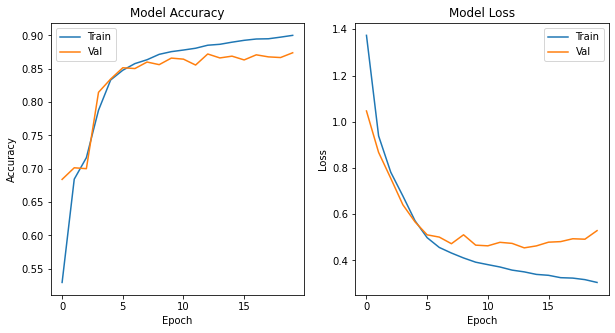

In [140]:
horizontal_plot_acc_loss(history_rms_opt)

### 3.2 Optimizador Adam

In [134]:
## Creamos el modelo
model_2 = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu',
         bias_initializer=keras.initializers.glorot_uniform(seed=None)),
    Dense(64, activation='relu'),
    Dense(2, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilamos
opt = keras.optimizers.Adam()
model_2.compile(
    optimizer =opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenamos
history_adam_opt = model_2.fit(x_train, keras.utils.to_categorical(y_train), validation_split=0.2, epochs=20, batch_size=64, verbose=0)

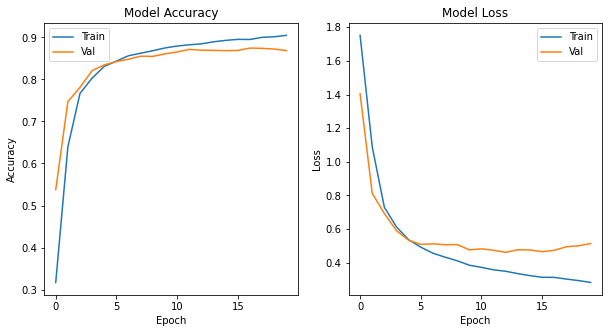

In [135]:
horizontal_plot_acc_loss(history_adam_opt)

### 3.3 Comparación

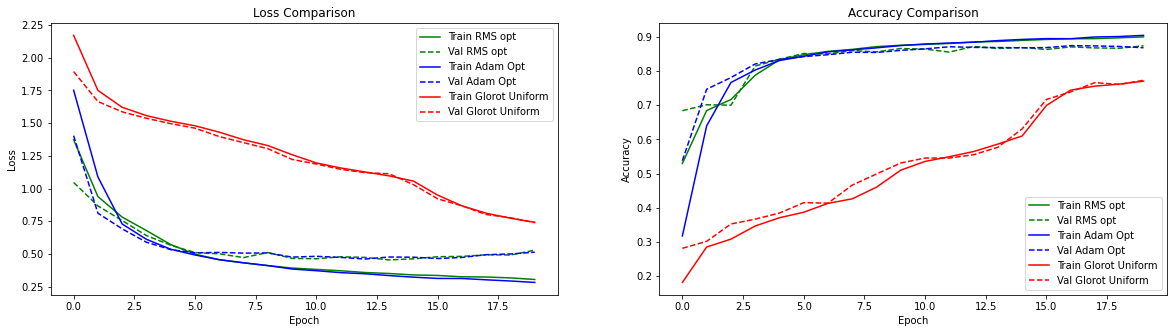

In [141]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_compare_losses(history_rms_opt, history_adam_opt, history_glorot_uniform, "RMS opt", "Adam Opt", "Glorot Uniform", "Loss Comparison")
plt.subplot(1,2,2)
plot_compare_accs(history_rms_opt, history_adam_opt, history_glorot_uniform, "RMS opt", "Adam Opt", "Glorot Uniform", "Accuracy Comparison")
plt.show()

## 4. Regularización y red final *(1.25 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

### 4.1 Definición del modelo

In [61]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dropout(0.2),
    Dense(784, activation='relu',
         bias_initializer=keras.initializers.glorot_uniform(seed=None),
         bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_40 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)              

### 4.2 Entrenamiento

In [62]:

opt = keras.optimizers.Adam()
model.compile(
    optimizer =opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) 
history = model.fit(x_train, keras.utils.to_categorical(y_train),
                    validation_split=0.2,
                    epochs=50,
                    batch_size=64,
                    verbose=1,
                    validation_data = (x_test, keras.utils.to_categorical(y_test)),
                    callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.5566 - accuracy: 0.8074 - val_loss: 0.4433 - val_accuracy: 0.8500
Epoch 2/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.4437 - accuracy: 0.8438 - val_loss: 0.4248 - val_accuracy: 0.8523
Epoch 3/50
60000/60000 [==============================] - 27s 456us/step - loss: 0.4136 - accuracy: 0.8545 - val_loss: 0.4239 - val_accuracy: 0.8550
Epoch 4/50
60000/60000 [==============================] - 26s 437us/step - loss: 0.3971 - accuracy: 0.8600 - val_loss: 0.3896 - val_accuracy: 0.8652
Epoch 5/50
60000/60000 [==============================] - 22s 364us/step - loss: 0.3816 - accuracy: 0.8661 - val_loss: 0.3766 - val_accuracy: 0.8672
Epoch 6/50
60000/60000 [==============================] - 22s 374us/step - loss: 0.3747 - accuracy: 0.8678 - val_loss: 0.3604 - val_accuracy: 0.8728
Epoch 7/50
60000/60000 [==============================] 

#### Definición del modelo
He usado una red neuronal grande (512 neuronas y dos hidden layers) con función de activación ReLU.
<br />Como estrategia de regularización se ha usado _dropout_ tanto en la capa visible, como en las hidden layers, porque he observado mejores resultados; Además he definido un valor peque;o, ya que si con esta técnica algunas neuronas desactivarán su salida aleatoriamente en cada batch, una probabilidad baja tendrá un efecto mínimo y un valor más alto en los resultados. Por esta misma razón he usado una red neuronal "tan grande" (hay más probabilidades de obtener mejores resultados).
<br />Como inicializador he seguido la estrategia _glorot uniform_ al ser la que mejor resultado ha dado en la comparativa anterior. Paralelamente L2 me ha dado mejores resultados que una combinación de L1 y L2


#### Optimizador
Se ha usado Adam como optimizador, ya que ha dado mejor rendimiento (combina lo mejor de RMSProp y AdaGrad). Jugando un poco con los parámetros se puede llegar a una buena inicialización de parámetros para este optimizador, como puede ser:
```
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1)
```
Sin embargo alcanza la misma accuracy pero con más iteraciones que si lo dejo con los valores por defecto (lo cual no es del todo deseable).

#### Entrenamiento
- **Validation** <br />
He usado un enfoque Cross Validation el cual divide el test y train dataset con el fin de evitar el _overfitting_ (combinadas con la regularización L2 comentada anteriormente).

- **epochs**<br />
He usado un número un poco más alto que en el ejercicio anterior, pero controlando las iteraciones con Early Stopping. 

- **Early Stopping** <br />
Pararemos el entrenamiento en el momento en el que el loss del modelo comience a incrementarse. _monitor_ te permite especificar qué medida monitorizar con el fin de parar el entrenamiento. De la misma manera, _mode_ tomará valores max o min para maximizar o minimizar respectivamente de acuerdo al parámetro anterior.
Cabe destacar, que tan pronto detecte un estancamiento en la mejora, no quiere decir que se un buen momento para parar: Puede que estemos atravesando una meseta justo antes de que la accuracy se dispare. Esto lo he controlado con el argumento _patience_ defininedo 15 epochs en las que puedo "hacer la vista gorda".

- **Verbose** <br />
Simplemente lo uso para saber en qué iteración ha decidido parar.



### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [63]:
loss, accuracy = model.evaluate(x_test,  keras.utils.to_categorical(y_test), verbose=2)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.8855000138282776


In [64]:
model.evaluate(
  x_test,
  keras.utils.to_categorical(y_test)
)

10000/10000 [==============================] - 1s 70us/step


[0.32810445864200594, 0.8855000138282776]